# Simulation of the Grid

In this chapter the grid can be simulated using the developed python tool.

```{admonition} See the Code
:class: seealso
The whole code is available in the [GitHub Repository](https://github.com/AndreGismo/SNEE-Projekt).
```

In [22]:
import pandapower as pp
from pandapower import networks as pn
from pandapower import plotting as pt
from scenario import Scenario
from controllable_battery import ControllableBattery

## Necessary Preparations

### Creating the network

The first step is to create the network:

In [2]:
# create the kerber network
net = pn.create_kerber_vorstadtnetz_kabel_1()

And take a look at it:

````{margin}
```{admonition} Hint
:class: attention
The plot doesn't reflect the lengths of the lines, but the correct lengths are stored in the `net`
```
````

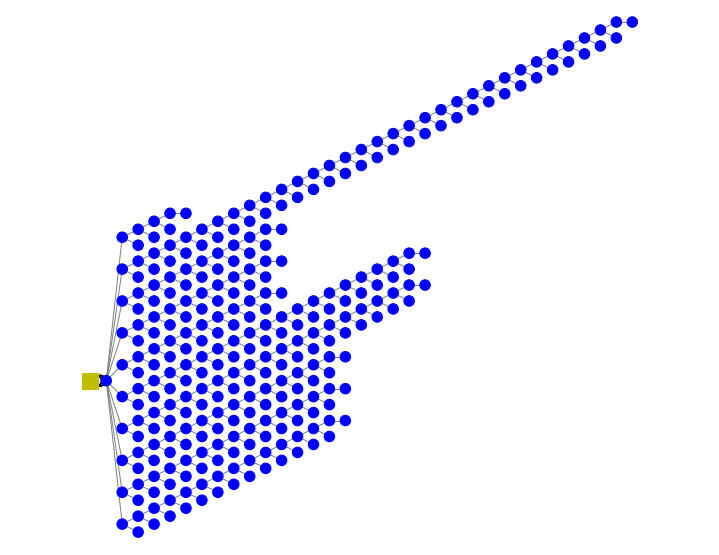

In [8]:
pt.simple_plot(net, library='igraph');

### Setting Parameters

As next step, some parameters determing the simulation have to be set:

- the resolution of the simulation (minimum 1 minute)
- whether to include some BEVs arriving at the same time
- whether to set all charging stations to the same nominal power
- whether to change the travelled distances
- setting the powerfactor of the SLP
- whether to activate controlling
- and finally setting the controlling parameters

__Set the resolution:__<br>
The `resolution` influences the $\Delta t$ from Equation [Equation 5](eq5) and thus the granularity of the whole simulation.

In [16]:
resolution = '15min'

__Make BEVs arrive at the same time:__<br>
This way it is possible to manipulate the arrival statistic depicted [Figure 5](fig5), allowing it to simulate extreme scenarios, where all the BEVs arrive at the same time.

In [17]:
same_arrival = True

# arrival_time needs to be set in multiples of quarter hours
arrival_time = 46

__Change the nominal power of the charging stations__:<br>
This way it is possible to manipulate the distibution of the nominal power of the charging stations.

In [18]:
same_power = True

# nominal charging power [kW]
loading_power = 11.1

__Change the travelled distance__:<br>
This makes it possible to adjust the travelled distance of the BEVs, thus determining the state of charge according to Equation [Equation 4](eq4) when the charging starts.

In [19]:
same_travelled = True

# travelled distance [km]
distance_travelled = 200

__Set the powerfactor of the SLP:__<br>
This makes it possible to simulate different powerfactors by adding reactive power to the SLP depicted in [Figure 3](fig3).

In [20]:
cosphi = 0.9

__Activate controlling:__<br>
This enables the controller.

In [21]:
controlling = True

__Set the controlling parameters:__<br>
This way the controlling parameters described in [here](controlling_paragraph).

In [23]:
ControllableBattery.set_control_params('Ki', 1.5)
ControllableBattery.set_control_params('Kd', 0.3)

### Creating a Scenario

````{margin}
```{admonition} Tip
:class: tip
There are already scenarios defined that satisfy the proposed {ref}`distibutions`, but it is also possible to create new scenarios using `Scenario(net, <penetration>)`.
```
````

Next choose one of the [proposed scenarios](scenarios):

In [11]:
scenario = Scenario.load_scenario('Szenario100')

<AxesSubplot:>

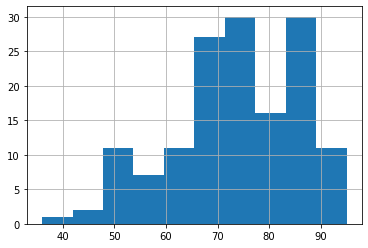

In [15]:
scenario.scenario_data['time of arrival'].hist()